In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# Baca dataset
df = pd.read_csv('cm1.csv')
print(df.head())

    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2         1.2          1.4    Fals

In [4]:
# Eksplorasi data awal
print("\nInformasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nDistribusi Kelas:")
print(df['defects'].value_counts())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  
 16  uniq_O

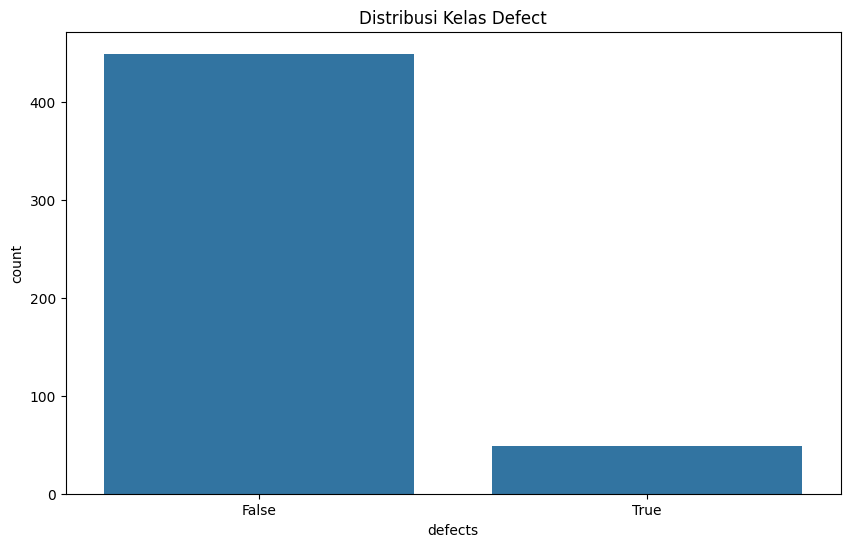

In [5]:
# Visualisasi data
plt.figure(figsize=(10,6))
sns.countplot(x='defects', data=df)
plt.title('Distribusi Kelas Defect')
plt.show()

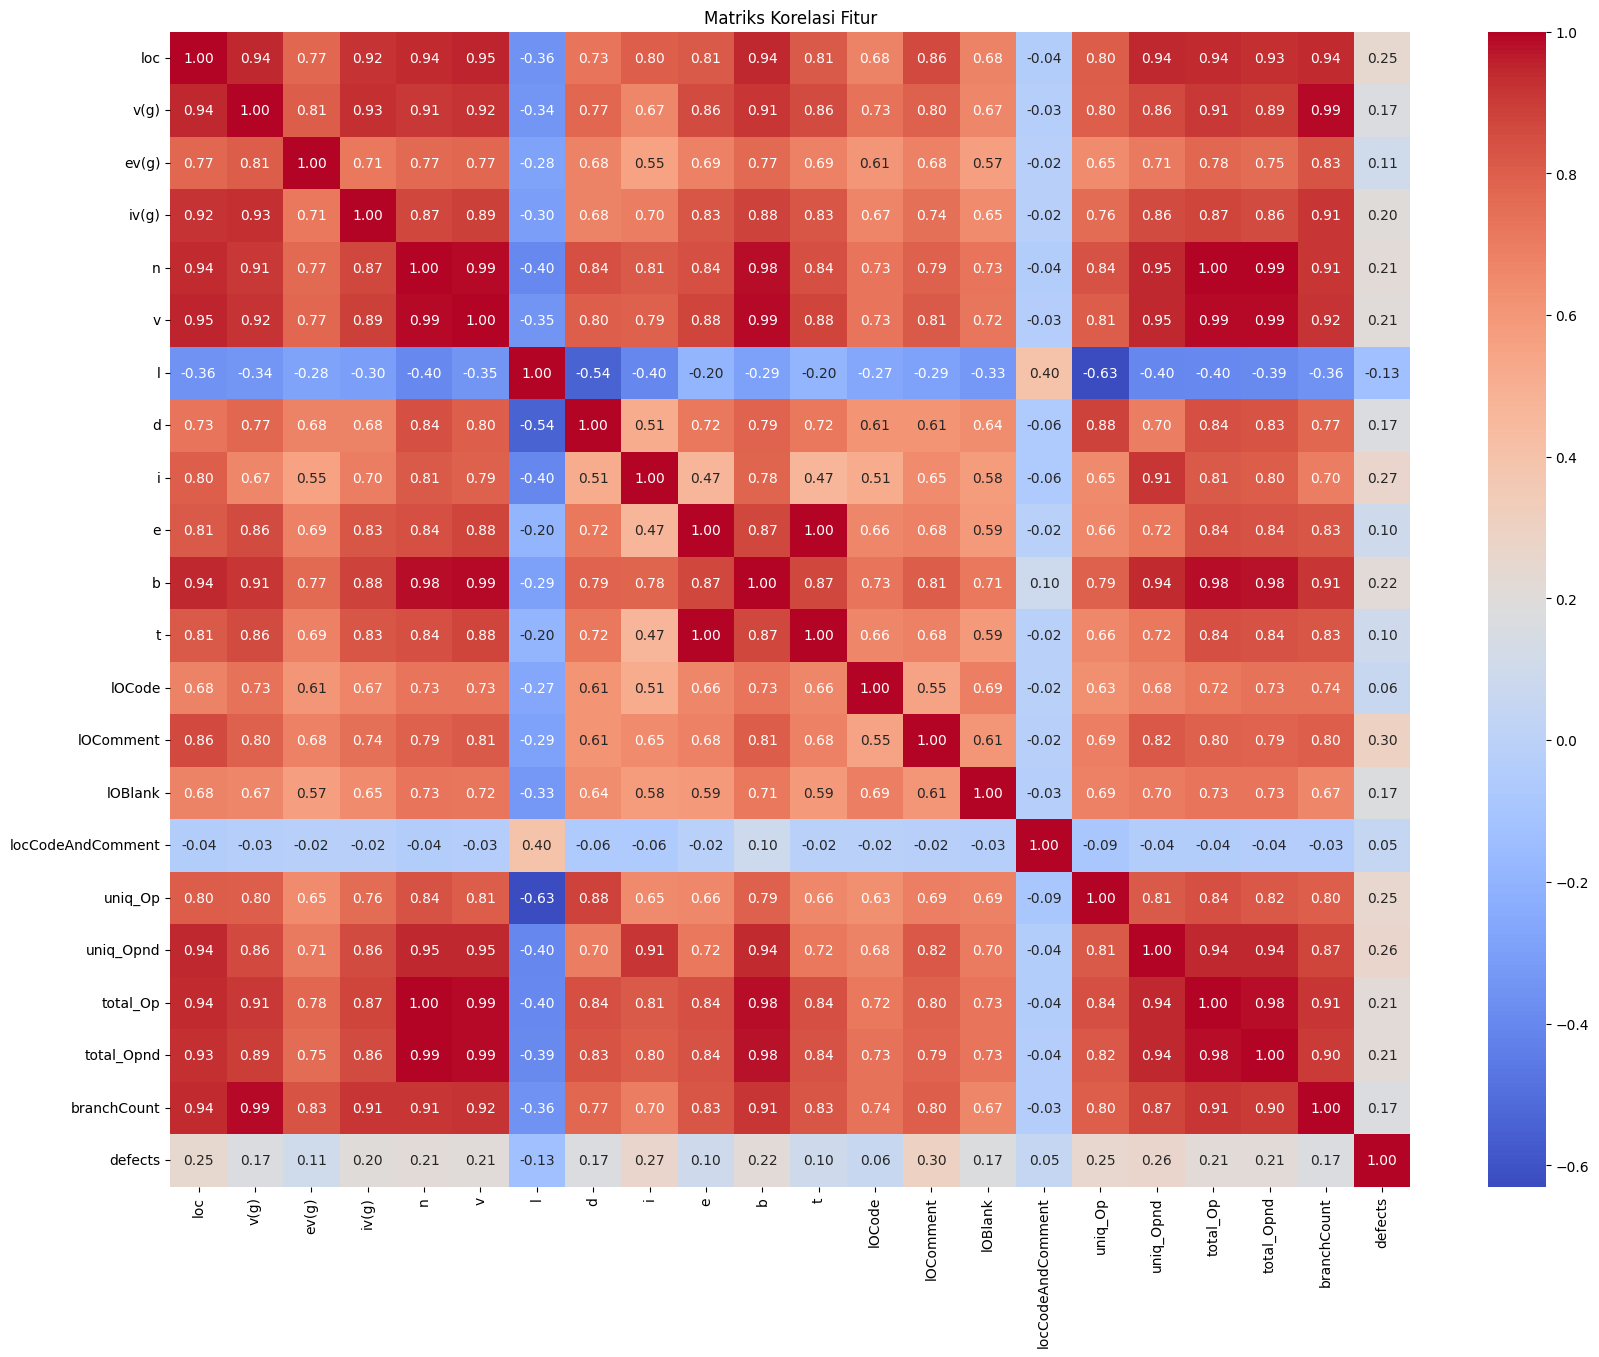

In [6]:
# Korelasi fitur
plt.figure(figsize=(20,15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi Fitur')
plt.show()

In [7]:
# Preprocessing data
# Pisahkan fitur dan target
X = df.drop('defects', axis=1)
y = df['defects']

In [8]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Handle imbalance data dengan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [11]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.87      0.89       135
        True       0.18      0.27      0.22        15

    accuracy                           0.81       150
   macro avg       0.55      0.57      0.55       150
weighted avg       0.84      0.81      0.82       150


Confusion Matrix:
[[117  18]
 [ 11   4]]

Accuracy: 0.8066666666666666
ROC AUC Score: 0.5666666666666667


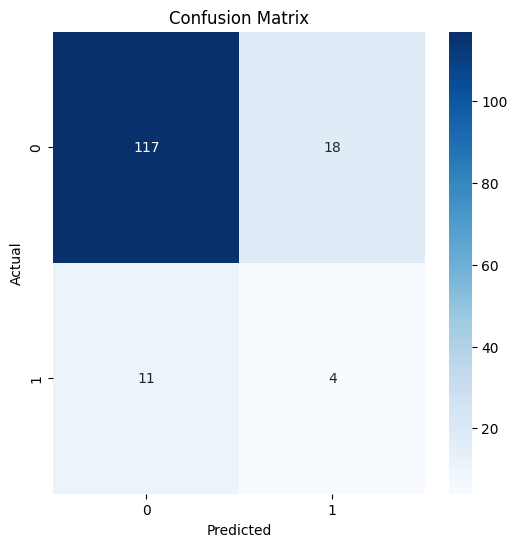

In [12]:
# Model 1: Random Forest
print("\n=== Random Forest ===")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
evaluate_model(rf, X_test_scaled, y_test)

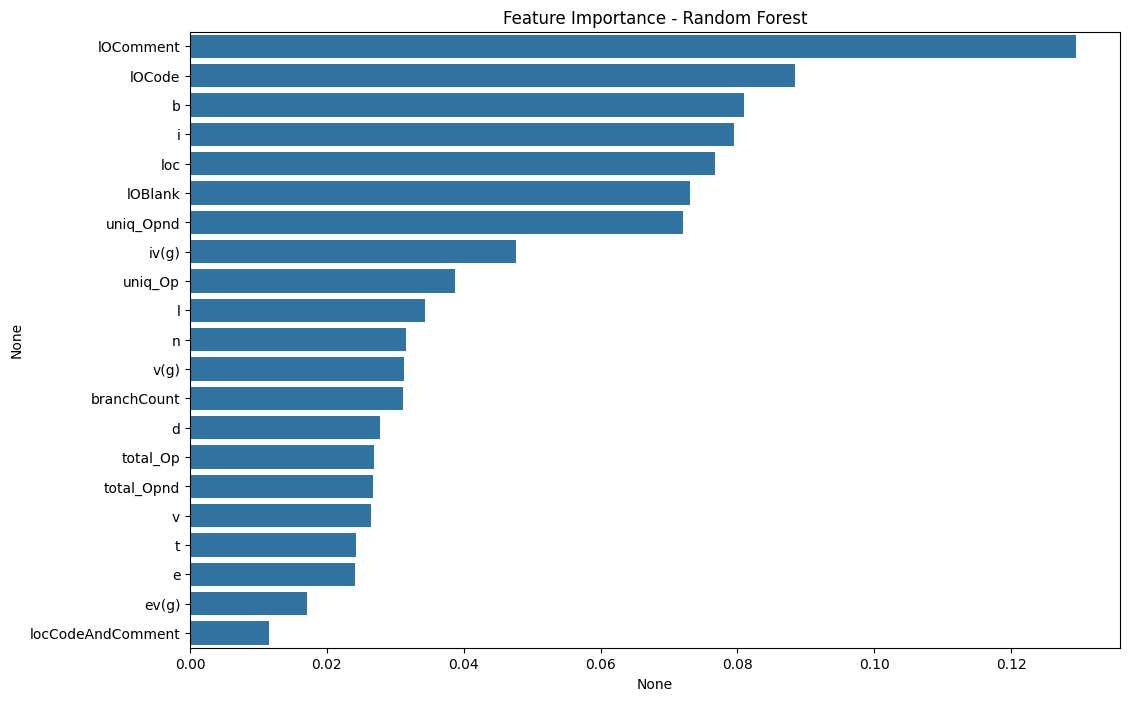

In [13]:
# Feature importance untuk Random Forest
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance - Random Forest')
plt.show()


=== SVM ===
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.71      0.81       135
        True       0.17      0.53      0.26        15

    accuracy                           0.69       150
   macro avg       0.55      0.62      0.53       150
weighted avg       0.86      0.69      0.75       150


Confusion Matrix:
[[96 39]
 [ 7  8]]

Accuracy: 0.6933333333333334
ROC AUC Score: 0.6222222222222222


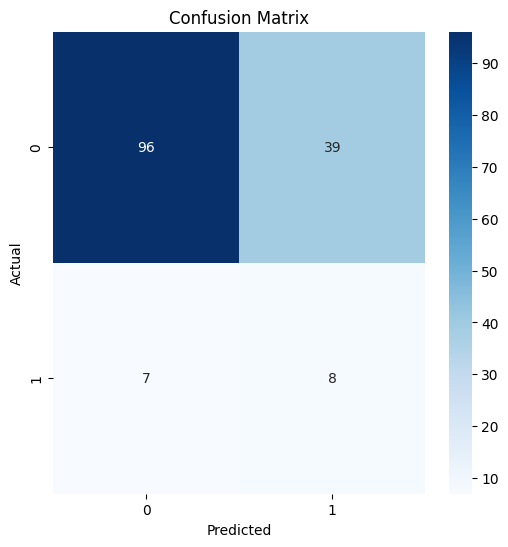

In [14]:
# Model 2: SVM
print("\n=== SVM ===")
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_res, y_train_res)
evaluate_model(svm, X_test_scaled, y_test)


=== k-NN ===
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.68      0.79       135
        True       0.17      0.60      0.27        15

    accuracy                           0.67       150
   macro avg       0.56      0.64      0.53       150
weighted avg       0.86      0.67      0.74       150


Confusion Matrix:
[[92 43]
 [ 6  9]]

Accuracy: 0.6733333333333333
ROC AUC Score: 0.6407407407407408


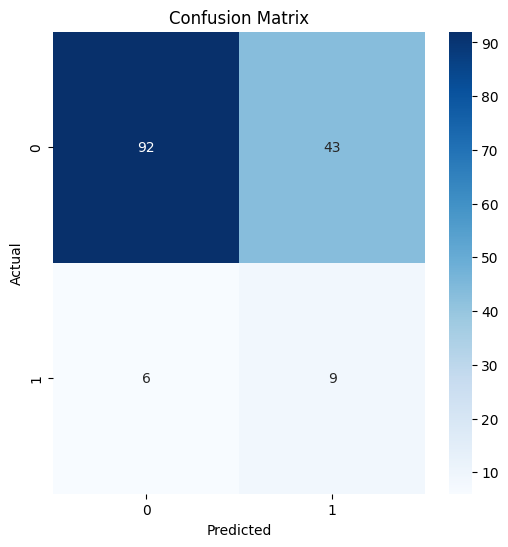

In [15]:
# Model 3: k-NN
print("\n=== k-NN ===")
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)
evaluate_model(knn, X_test_scaled, y_test)


=== Optimasi Random Forest ===
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.88      0.90       135
        True       0.20      0.27      0.23        15

    accuracy                           0.82       150
   macro avg       0.56      0.57      0.56       150
weighted avg       0.84      0.82      0.83       150


Confusion Matrix:
[[119  16]
 [ 11   4]]

Accuracy: 0.82
ROC AUC Score: 0.5740740740740742


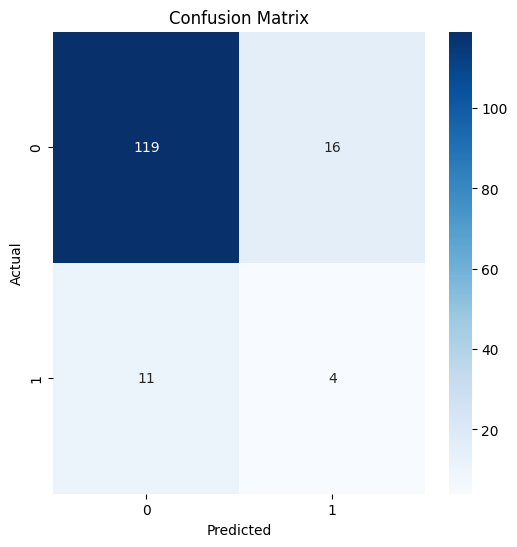

In [16]:
# Optimasi Hyperparameter untuk Random Forest
print("\n=== Optimasi Random Forest ===")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         scoring='roc_auc')

grid_search.fit(X_train_res, y_train_res)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
evaluate_model(best_rf, X_test_scaled, y_test)

In [ ]:
# Simpan model terbaik
import joblib
joblib.dump(best_rf, 'best_defect_model.pkl')